In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df=pd.read_csv('Linear_regression_energy.csv')

In [90]:
df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
1095,Residential,14419,68,44,23.95,Weekend,3661.21
1096,Industrial,12194,7,22,14.67,Weekend,3546.34
1097,Commercial,39562,88,20,32.18,Weekday,5147.21
1098,Residential,8348,67,37,16.48,Weekend,3244.98


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   object 
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Day of Week          1100 non-null   object 
 6   Energy Consumption   1100 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 60.3+ KB


In [71]:
df['Building Type'].unique()


array(['Residential', 'Commercial', 'Industrial'], dtype=object)

In [72]:
df['Day of Week'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [99]:
df.drop(['Building Type','Day of Week'],axis=1,inplace=True)

In [100]:
df

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
0,24563,15,4,28.52,2865.57
1,27583,56,23,23.07,4283.80
2,45313,4,44,33.56,5067.83
3,41625,84,17,27.39,4624.30
4,36720,58,47,17.08,4820.59
...,...,...,...,...,...
1095,14419,68,44,23.95,3661.21
1096,12194,7,22,14.67,3546.34
1097,39562,88,20,32.18,5147.21
1098,8348,67,37,16.48,3244.98


In [75]:
df.isnull().sum()

,0
Square Footage,0
Number of Occupants,0
Appliances Used,0
Average Temperature,0
Energy Consumption,0


In [76]:
df.duplicated().sum()

np.int64(0)

OUTLINERS REMOVAL

In [77]:
df.shape

(1100, 5)

In [101]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,25500.527273,48.268182,25.730000,22.559745,4168.191273
std,14236.955632,29.127624,14.116209,7.122357,924.278723
min,560.000000,1.000000,1.000000,10.050000,1683.950000
25%,13203.750000,22.000000,13.000000,16.365000,3510.460000
50%,25785.500000,47.000000,26.000000,22.810000,4189.690000
75%,37536.750000,73.000000,38.000000,28.760000,4859.510000
max,49997.000000,99.000000,49.000000,34.990000,6530.600000


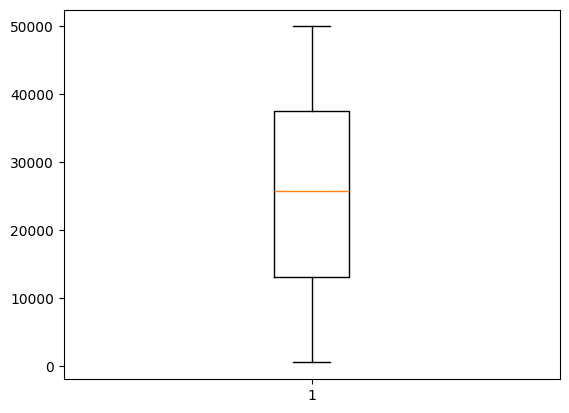

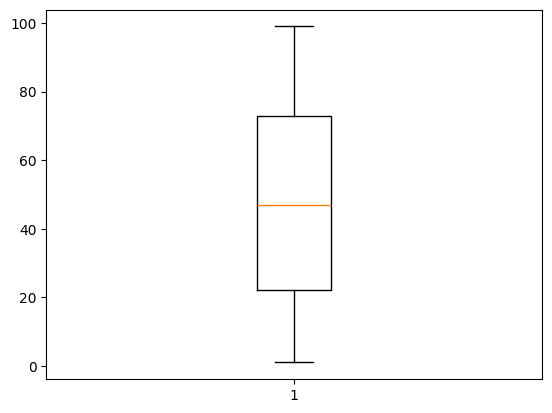

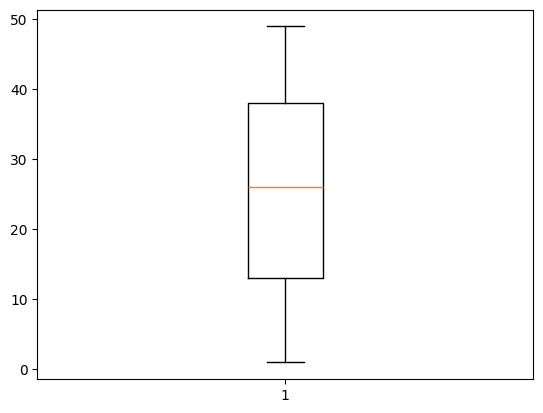

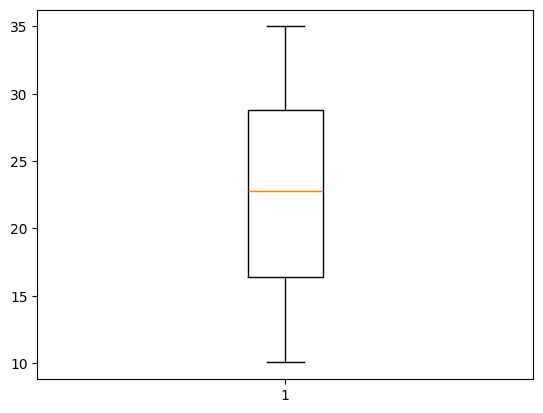

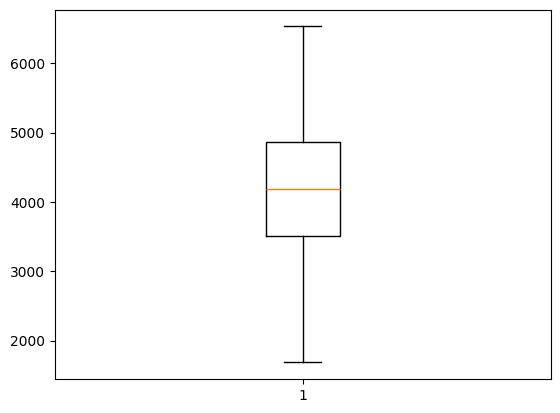

In [102]:
for i in df.columns:
  if((df[i].dtype=='float64') or (df[i].dtype=='int64')):
    plt.boxplot(df[i])
    plt.show()


In [80]:
def remove_outliers(df,columns):

  for i in columns:
    if((df[i].dtype=='float64') or (df[i].dtype=='int64')):
      q1=df[i].quantile(0.25)
      q3=df[i].quantile(0.75)
      iqr=q3-q1
      upperfence=q1-1.5*iqr
      lowerfence=q3+1.5*iqr
      df=df[(df[i]<upperfence) & (df[i]>lowerfence)]
  return df




In [103]:
columns=[]
for i in df.columns:
  if((df[i].dtype=='float64') or (df[i].dtype=='int64')):
    columns.append(i)

In [104]:
columns

['Square Footage',
 'Number of Occupants',
 'Appliances Used',
 'Average Temperature',
 'Energy Consumption']

In [83]:
df=remove_outliers(df,columns)

In [105]:
df

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
0,24563,15,4,28.52,2865.57
1,27583,56,23,23.07,4283.80
2,45313,4,44,33.56,5067.83
3,41625,84,17,27.39,4624.30
4,36720,58,47,17.08,4820.59
...,...,...,...,...,...
1095,14419,68,44,23.95,3661.21
1096,12194,7,22,14.67,3546.34
1097,39562,88,20,32.18,5147.21
1098,8348,67,37,16.48,3244.98


In [85]:
columns

['Square Footage',
 'Number of Occupants',
 'Appliances Used',
 'Average Temperature',
 'Energy Consumption']

In [121]:
columns_train=[]
for i in columns:
  if(i!='Energy Consumption'):
    columns_train.append(i)

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [122]:
X=df[columns_train]   # Store all column in a variable X
vif_data = pd.DataFrame()  # Create a datafarem to store column name and its VIF value
vif_data["Column Name"] =X.columns
vif_data["VIF value"]=[variance_inflation_factor(X.values,i)for i in range(len(X.columns))]  # Finding the VIF value for columns
print(vif_data)

           Column Name  VIF value
0       Square Footage   3.618280
1  Number of Occupants   3.321403
2      Appliances Used   3.468204
3  Average Temperature   5.455189


In [124]:
x=df[columns_train]
y=df['Energy Consumption']

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [127]:
x_train

,Square Footage,Number of Occupants,Appliances Used,Average Temperature
274,23911,93,48,31.37
761,8470,50,46,26.35
722,29692,13,45,26.11
1056,27484,47,48,28.79
861,31790,46,31,27.09
...,...,...,...,...
490,18797,94,25,20.37
256,41131,12,14,13.25
1032,42152,47,21,27.70
733,17675,48,36,19.41


In [128]:
y_train

,Energy Consumption
274,4978.71
761,3761.75
722,3884.07
1056,4160.27
861,4534.07
...,...
490,4278.00
256,4890.31
1032,4859.08
733,4036.68


In [129]:
from sklearn.linear_model import LinearRegression,Ridge

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [130]:
prediction=model.predict(x_test)

In [131]:
from sklearn.metrics import r2_score

r = r2_score(y_test, prediction)


# If you want to show it as a percentage:
print("R² Score (Percentage):", r * 100)

R² Score (Percentage): 77.95597766725733


In [133]:
# Calculate R² for both sets
train_r2 = r2_score(y_train, model.predict(x_train))
val_r2 = r2_score(y_test, model.predict(x_test))

print(f"Training R²: {train_r2:.3f}")
print(f"Validation R²: {val_r2:.3f}")
print(f"Gap: {train_r2 - val_r2:.3f}")

Training R²: 0.809
Validation R²: 0.780
Gap: 0.029


Text(0, 0.5, 'Predicted charges values')

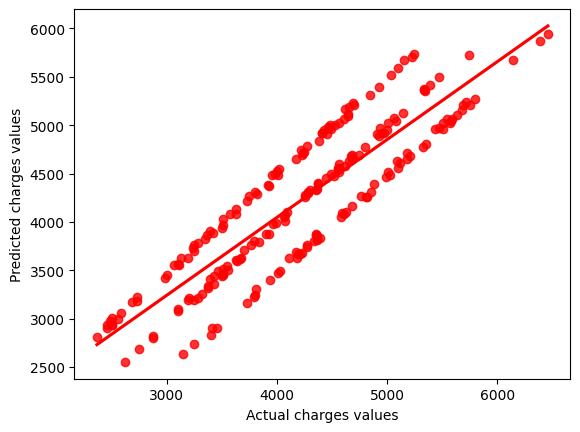

In [134]:
sns.regplot(x=y_test,y=prediction,ci=None,color ='red')
plt.xlabel('Actual charges values')
plt.ylabel('Predicted charges values')

In [140]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']